<a href="https://colab.research.google.com/github/mohdirfan0408/GRIP_Task1/blob/main/GRIP_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARK FOUNDATION

# GRIP: TASK 1
# Problem Statement: Predict the percentage of a student based on the no. of study hours using Supervised Machine learning.

Executed by Mohd Irfan Mohd Ismail

In [ ]:
#Importing important libraries used in the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
#matplotlib inline

# Importing Data and Displaying it

In [ ]:
#importing data from the provided link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print('----------Data Imported Successfully----------')

#printing top rows of the dataframe
df.head()

----------Data Imported Successfully----------


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# checking for any missing values

In [ ]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

#Visualizing the given DataFrame

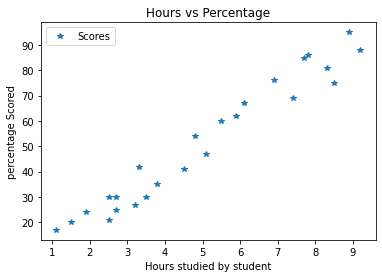

In [ ]:
df.plot(x="Hours" , y="Scores",style="*")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied by student")
plt.ylabel("percentage Scored")
plt.show()

#Distributing the dataset in 'X' & 'Y' 

In [ ]:
X= df.iloc[:,:-1].values
Y= df.iloc[:,1].values

print('X_arr shape:',X.shape)
print('Y_arr shape:',Y.shape)

X_arr shape: (25, 1)
Y_arr shape: (25,)


#Dividing the data set into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',X_test.shape)

X_train shape: (20, 1)
X_test shape: (5, 1)
y_train shape: (20,)
y_test shape: (5, 1)


#Training our model using model 1: Linear Regression



In [ ]:
model1= LinearRegression()
model1.fit(X_train,y_train)
print('training completed')


training completed


#Plotting the trained model with our dataset

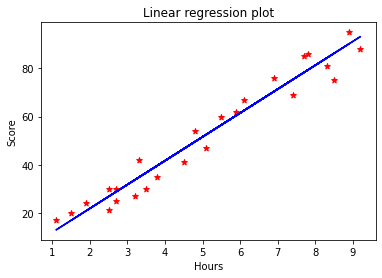

In [ ]:
line = model1.coef_*X + model1.intercept_

plt.scatter(X,Y,color='red',marker='*')
plt.plot(X, line, color='blue')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Linear regression plot")
plt.show()



#Comparing the actual and predicted values of y

In [ ]:
y_pred1 = model1.predict(X_test)
set1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
set1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#checking performance of model 1 : Linear Regression

In [ ]:
print('training model accuracy:', (100*model1.score(X_train,y_train)).round(2),'%')
print('prediction model accuracy:', (100*(model1.score(X_test,y_test))).round(2),'%')
mean1=mean_absolute_error(y_test,y_pred1)
root1=np.sqrt(mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error in model 1:',mean1.round(3))
print('Root Mean Squared Error in model 1:',root1.round(3))


training model accuracy: 95.16 %
prediction model accuracy: 94.55 %
Mean Absolute Error in model 1: 4.184
Root Mean Squared Error in model 1: 4.647


#Training our model using model 2 : Random Forest Regressor

In [ ]:
model2=RandomForestRegressor(n_estimators=10, random_state=0)
model2.fit(X_train,y_train)
print('traning completed')


traning completed


#Comparing the actual and predicted values of y

In [ ]:
y_pred2=model2.predict(X_test)
hours=X_test.flatten()
set2=pd.DataFrame({'Hours':hours,'Actual':y_test,'Prediction':y_pred2})
set2

,Hours,Actual,Prediction
0,1.5,20,19.7
1,3.2,27,38.4
2,7.4,69,84.3
3,2.5,30,23.0
4,5.9,62,66.5


#checking performance of model 2 : Random Forest Regressor

In [ ]:
print('training model accuracy:', (100*model2.score(X_train,y_train)).round(2),'%')
print('prediction model accuracy:', (100*(model2.score(X_test,y_test))).round(2),'%')
mean2=mean_absolute_error(y_test,y_pred2)
root2=np.sqrt(mean_squared_error(y_test,y_pred1))
print('Mean Absolute Error in model 2:',mean2.round(3))
print('Root Mean Squared Error in model 2:',root2.round(3))

training model accuracy: 98.66 %
prediction model accuracy: 78.12 %
Mean Absolute Error in model 2: 7.7
Root Mean Squared Error in model 2: 4.647


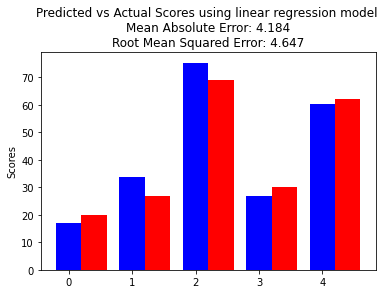

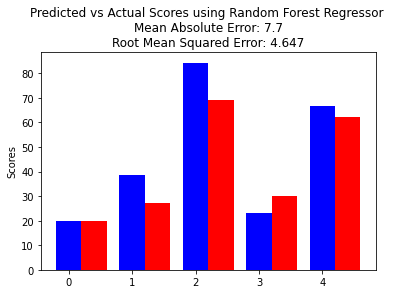

In [ ]:
N=np.arange(5)
plt.bar(N+0.4, y_test,width=0.4,label='Actual',color='red')
plt.bar(N, y_pred1,width=0.4,label='Linear Regression',color='blue')
plt.title('Predicted vs Actual Scores using linear regression model \nMean Absolute Error: {}\nRoot Mean Squared Error: {}'.format(mean1.round(3),root1.round(3)))
plt.ylabel('Scores')
plt.show()

plt.bar(N+0.4, y_test,width=0.4,label='Actual',color='red')
plt.bar(N, y_pred2,width=0.4,label='Linear Regression',color='blue')
plt.title('Predicted vs Actual Scores using Random Forest Regressor \nMean Absolute Error: {}\nRoot Mean Squared Error: {}'.format(mean2.round(3),root2.round(3)))
plt.ylabel('Scores')
plt.show()



#Predicted score of student if he studies for 9.25 hours.

In [ ]:
#predicting using linear regression model
hours=9.25
score_pred=model1.predict([[hours]])
print('Number of hours student studied: {}'.format(hours))
print('predicted score: {}'.format(score_pred[0]))


Number of hours student studied: 9.25
predicted score: 93.69173248737539
